## Purpose:

#### Generate report style infographic --

This notebook is intended to be a 'summary' report guide. It organizes the elements present in preceding notebooks and generates summary maps and text

In [1]:
import os
import sys

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("The current Working Directory is:", current_directory)

# Get the path to the base directory (VIEWS_FAO_index)
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(f'The base directory will be set to: {base_dir}')

# Add the base directory to sys.path
sys.path.insert(0, base_dir)

The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index


In [2]:

from src.utils.universal_functions.setup.generate_base_file import give_primary_frame

from src.utils.functions_for_return_periods.insurance_products_for_RP import insurance_files

#Functions for graphics:
from src.utils.functions_for_graphics.individual_graphics.map_helper.manipulate_tables_for_mapping import clean_info_dataframe, query_and_sort_annual_table, provide_values_at_input_return_periods, retrieve_geodataframe, define_year_to_map, query_geodataframe

from src.utils.functions_for_graphics.individual_graphics.image_annual_returnperiod_table import image_save_returnperiodtable
from src.utils.functions_for_graphics.individual_graphics.image_annual_returnperiod_lineplot import lineplot_frominfo
from src.utils.functions_for_graphics.individual_graphics.image_annual_summary_table import plot_and_colorize_annual_table
from src.utils.functions_for_graphics.individual_graphics.image_map_for_Ei import image_save_map_E_i

from src.utils.functions_for_graphics.layout_formats.Layout_single_method_option2 import mapped_option2
#from src.utils.functions_for_graphics.layout_formats.Layout_single_method_option1 import mapped_option1


#functions for all methods
from src.utils.universal_functions.FAO_table_formatting.generate_output_tables import generate_and_give_info_dataframe



The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The curren

In [3]:
data = give_primary_frame('Fatalities_fao_pgm', 'cm_properties', 1988, 2023)

100%|██████████| 40.0M/40.0M [00:36<00:00, 1.10MB/s]


Queryset Fatalities_fao_pgm read successfully 
Queryset cm_properties read successfully 
['month_id', 'pg_id', 'country_name', 'C_start_year', 'C_end_year', 'pop_gpw_sum', 'ged_sb', 'ged_ns', 'ged_os', 'year', 'fatalities_sum', 'country_id']


In [4]:
data_working_copy = data

### Provides the primary dataframes defined by the FAO request for information

#### Country Year 

### Select from:

#### 'standard' or 'aggregation' or 'smoothing'

In [5]:
method = 'standard' # 'standard' or 'aggregation' or 'smoothing'

#No need to change -- elements are dependant on the input above:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
if method == 'smoothing':
    value_field = 'perca_Mean'
else:
    value_field = 'percapita_100k'

### Select from:

#### 'Event year' or 'Country year'

In [24]:
return_period = 'Event year' # 'Event year' or 'Country year'

#No need to change -- elements are dependant on the input above:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
if return_period == 'Event year':
    insurance_attribute = 'Intended Return Period'
if return_period == 'Country year':
    insurance_attribute = 'Return Period'

In [25]:
country = 'Burkina Faso'

### Select from:

#### integer value 2-10

A value error will be raised to prompt a new input if the selection does match specifications required for the intended method

In [26]:
aggregation = '1'

#No need to change -- elements are dependant on the input above:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
if method == 'aggregation' and int(aggregation) <= 1:
    raise ValueError("Aggregation value must be greater than 1 for the 'aggregation' method.")

if method == 'standard' or method == 'smoothing':
    aggregation = '1'
print(aggregation)

1


In [27]:
sort_annual_report_by = 'average_value' # 'first_value' or 'average_value' /// or year but this is not built in yet

In [28]:

conflict_profile, x, y, z = insurance_files(data_working_copy, country, method, return_period, aggregation_unit=aggregation)

print(x.head(10))
print('y dataframe')
print(y)
print('z dataframe:')
print(z)


   c_id  country_name  C_start_year  C_end_year      0
0    47  Burkina Faso          1960        2050  35496
the length of country_ids for the selected country is: 1
printing he country and year dictionary:
{47: (1960, 2050)}
Index where percapita_100k equals 1: 94.6: 1.3
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Burkina Faso/Standard/Country Year/FAO tables' already exists.
saving annual_summary table to: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Burkina Faso/Standard/Country Year/FAO tables/Burkina Faso annual summary.csv
saving insurance table to: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Burkina Faso/Standard/Country Year/FAO tables/Burkina Faso insurance table.csv
saving main dataframe table to: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Burkina Faso/Standard/Country Year/FAO tables/Burkina Faso main dataframe.csv
    percapita_100k       p_i      

In [29]:
info_df, color_scheme = generate_and_give_info_dataframe(z, return_period, value_field, insurance_attribute)
print(info_df)

This is a critical dataframe:
   Return Period           Range    Color              Label
0              0       0 - 164.0  #d5dbdb  Below 1 in 5 year
1              5   164.0 - 219.9  #4daf4a        1 in 5 year
2             10   219.9 - 260.5  #377eb8       1 in 10 year
3             20   260.5 - 478.6  #e6ab02       1 in 20 year
4             30  478.6 - 100000  #c51b7d       1 in 30 year


In [30]:
#define the return period that should be dropped (if any) DEFUALT: 0

#--------------------------------------------------------------------------------
#     This is what should be changed     
#--------------------------------------------------------------------------------
rp_to_drop=[]
#--------------------------------------------------------------------------------
cleaned_labels, cleaned_thresholds, filtered_info = clean_info_dataframe(info_df,rp_to_drop)


print('Reference the Info Dataframe:')
print(filtered_info)
print()
print(f'Here are the labels to be referenced: {cleaned_labels}')
print(f'Here are the corresponding thresholds to be referenced: {cleaned_thresholds}')

Reference the Info Dataframe:
   Return Period           Range    Color              Label
0              0       0 - 164.0  #d5dbdb  Below 1 in 5 year
1              5   164.0 - 219.9  #4daf4a        1 in 5 year
2             10   219.9 - 260.5  #377eb8       1 in 10 year
3             20   260.5 - 478.6  #e6ab02       1 in 20 year
4             30  478.6 - 100000  #c51b7d       1 in 30 year

Here are the labels to be referenced: ['Below 1 in 5 year', '1 in 5 year', '1 in 10 year', '1 in 20 year', '1 in 30 year']
Here are the corresponding thresholds to be referenced: [164.0, 219.9, 260.5, 478.6]


Here changes are being made locally to the function: lineplot_frominfo

In [13]:
from src.utils.universal_functions.setup.build_directory import float_to_custom_string, ensure_directory_exists
from src.utils.functions_for_graphics.individual_graphics.map_helper.manipulate_tables_for_mapping import provide_values_at_input_return_periods
from src.utils.functions_for_graphics.layout_formats.rgb import rgb_to_hex
import matplotlib.pyplot as plt

def float_to_custom_string(value):
    return f"{value:.1f}"

def lineplot_frominfo(table, info_dataframe, country, method, returnperiodmethod, aggregation, value_field='percapita_100k', labels_to_omit='Below 1 in 10 year', figure_height=3.0, figure_width=6.0):

    figure_height_str = float_to_custom_string(figure_height)
    figure_width_str = float_to_custom_string(figure_width)

    aggregation_string = str(aggregation) + 'x' + str(aggregation)

    base_directory = os.getcwd()
    # Ensure all path components are strings

    if aggregation == '1':
        output_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  +  '/plot_png'
    else:
        output_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/plot_png'

    ensure_directory_exists(output_path)


#WE DO NOT WANT TO PRINT LABELS THAT HAVE A RANGE STARTING AT 0!
# Initialize the list
    list_of_labels_to_omit = []

    # Check if any range starts with '0.0' and add corresponding labels to labels_to_omit
    for index, row in info_dataframe.iterrows():
        if row['Range'].startswith('0.0'):
            list_of_labels_to_omit.append(row['Label'])

    # Additional label to omit

    # Append the additional label to the list
    list_of_labels_to_omit.append(labels_to_omit)
#------------------------------------------------------------------------------------
    # Initialize results dictionary
    results = {'year': [], 'Label': [], 'count': []}

    # Debug: print unique years from table
    print("Unique years in table:", table['year'].unique())

    # Debug: print initial info_dataframe
    print("Initial info_dataframe:\n", info_dataframe)

    # Iterate over each year and range to count occurrences
    for year in table['year'].unique():
        for _, row in info_dataframe.iterrows():
            range_start, range_end = map(float, row['Range'].split(' - '))
            label = row['Label']

            # Debug: print current label and range being processed
            print(f"Processing: Year: {year}, Label: {label}, Range: {range_start} - {range_end}")

            count = table[(table['year'] == year) & 
                          (table[value_field] >= range_start) & 
                          (table[value_field] < range_end)].shape[0]

            results['year'].append(year)
            results['Label'].append(label)
            results['count'].append(count)

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)

    # Debug: print results_df before merging
    print("Results DataFrame before merging:\n", results_df)

    # Merge with info_df to add Color column
    results_df = results_df.merge(info_dataframe[['Label', 'Color']], on='Label', how='left')

    # Debug: print results_df after merging
    print("Results DataFrame after merging:\n", results_df)

    # Filter out the 'Below 1 in 10 year' label
    results_df = results_df[~results_df['Label'].isin(list_of_labels_to_omit)]

    # Debug: print results_df after filtering
    print("Results DataFrame after filtering:\n", results_df)

    results_df = results_df.sort_values(by='year')

    output_file = os.path.join(output_path, f'{country} Annual Return Period LinePlot with dimensions {figure_width_str}x{figure_height_str}.png')

    # Plotting
    plt.figure(figsize=(6, 3))
    line_widths = [4, 3, 2, 1]  # Define line widths
    labels = results_df['Label'].unique()
    
    # Adjust the number of widths if there are more labels
    if len(labels) > len(line_widths):
        line_widths = [1.0 + 0.1 * i for i in range(len(labels))]

    # Reverse the order of labels for plotting thicker lines first
    labels = labels[::-1]
    
    for i, label in enumerate(labels):
        subset = results_df[results_df['Label'] == label]
        plt.plot(subset['year'], subset['count'], label=label, color=subset['Color'].iloc[0], linewidth=line_widths[i % len(line_widths)])


    # for label in results_df['Label'].unique():
    #     subset = results_df[results_df['Label'] == label]
    #     plt.plot(subset['year'], subset['count'], label=label, color=subset['Color'].iloc[0])

    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Occurrences by Year and Return Period Label')
    plt.grid(True)

    fig = plt.gcf()  # Get the current figure
    fig.patch.set_facecolor('white')  # Set the figure's face color to white


    plt.savefig(output_file, dpi=300, bbox_inches='tight', pad_inches=0.05)

    plt.show()

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have the `lineplot_frominfo` function and data from the previous step.

# Step 1: Calculate the histogram data
def calculate_histogram_data(df):
    # Group by year and sum relevant columns
    df_grouped = df.groupby('year').agg({
        'fatalities_sum': 'sum',
        'pop_gpw_sum': 'sum'
    }).reset_index()
    
    # Recalculate per capita fatalities per 100k population
    df_grouped['percapita_100k'] = (df_grouped['fatalities_sum'] / df_grouped['pop_gpw_sum']) * 100000
    return df_grouped

# Step 2: Plotting the histogram and line plot together
def plot_histogram_with_lineplot(df, info_dataframe, country, method, returnperiodmethod, aggregation, value_field='percapita_100k', labels_to_omit='Below 1 in 10 year', figure_height=3.0, figure_width=6.0):

    figure_height_str = float_to_custom_string(figure_height)
    figure_width_str = float_to_custom_string(figure_width)

    aggregation_string = str(aggregation) + 'x' + str(aggregation)

    base_directory = os.getcwd()
    # Ensure all path components are strings

    if aggregation == '1':
        output_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  +  '/plot_png'
    else:
        output_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/plot_png'

    ensure_directory_exists(output_path)

    output_file = os.path.join(output_path, f'{country} Annual Return Period LinePlot with dimensions {figure_width_str}x{figure_height_str}.png')


    # Calculate histogram data
    df_histogram = calculate_histogram_data(df)
    
    # Initialize the list of labels to omit
    list_of_labels_to_omit = []

    # Check if any range starts with '0.0' and add corresponding labels to labels_to_omit
    for index, row in info_dataframe.iterrows():
        if row['Range'].startswith('0.0'):
            list_of_labels_to_omit.append(row['Label'])

    # Additional label to omit
    list_of_labels_to_omit.append(labels_to_omit)
    
    # Begin plotting
    fig, ax1 = plt.subplots(figsize=(figure_width, figure_height))

    # Plot the histogram on the first y-axis
    ax1.bar(df_histogram['year'], df_histogram['percapita_100k'], color='lightgray', label='Per Capita Fatalities', alpha=0.7)

    ax1.set_xlabel('Year')
    ax1.set_ylabel('Count of Return Period Triggers', color='black')
    ax1.tick_params(axis='y', labelcolor='black')

    # Create a second y-axis
    ax2 = ax1.twinx()

    # Initialize results dictionary for line plot
    results = {'year': [], 'Label': [], 'count': []}

    # Iterate over each year and range to count occurrences
    for year in df['year'].unique():
        for _, row in info_dataframe.iterrows():
            range_start, range_end = map(float, row['Range'].split(' - '))
            label = row['Label']

            count = df[(df['year'] == year) & 
                       (df[value_field] >= range_start) & 
                       (df[value_field] < range_end)].shape[0]

            results['year'].append(year)
            results['Label'].append(label)
            results['count'].append(count)

    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    results_df = results_df.merge(info_dataframe[['Label', 'Color']], on='Label', how='left')

    # Filter out labels that should be omitted
    results_df = results_df[~results_df['Label'].isin(list_of_labels_to_omit)]

    # Sort the DataFrame by year
    results_df = results_df.sort_values(by='year')

    # Plotting the line plot
    line_width = 0.75  # Define the uniform line width
    labels = results_df['Label'].unique()
    
    for label in labels:
        subset = results_df[results_df['Label'] == label]
        ax2.plot(subset['year'], subset['count'], label=label, color=subset['Color'].iloc[0], linewidth=line_width)

    ax2.set_ylabel('Per Capita Fatalities (100k)', color='gray')

    ax2.tick_params(axis='y', labelcolor='gray')

    # Add a legend
    lines, labels = ax2.get_legend_handles_labels()
    #ax2.legend(lines, labels, loc='upper left')

    # Set the title of the plot
    plt.title(f'return period thresholds over time')

    fig = plt.gcf()  # Get the current figure
    fig.patch.set_facecolor('white')  # Set the figure's face color to white

    plt.savefig(output_file, dpi=300, bbox_inches='tight', pad_inches=0.05)

    plt.show()

# Example usage:
# plot_histogram_with_lineplot(table, info_dataframe, 'CountryName', 'MethodName', 'ReturnPeriodMethod', 'AggregationType')


## Garrett: make sure the local changes made below are added to the respective .py file and changes committed to graphics branch

In [16]:
def image_save_returnperiodtable(input_table, colors, column_to_apply_symbology, country, method, returnperiodmethod, aggregation='1', figure_height=1.75, figure_width=2.5): #input_table = Jerry_table

    #Feedback on Sept 05 was to make column names lower case. The column_to_apply_symbology must now also be lowercase:
    column_to_apply_symbology = column_to_apply_symbology.lower()

    figure_height_str = float_to_custom_string(figure_height)
    figure_width_str = float_to_custom_string(figure_width)

    aggregation_string = str(aggregation) + 'x' + str(aggregation)


    base_directory = os.getcwd()
    if aggregation == '1':
        output_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'table_png/percentile and payout table/'
    else:
        output_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/percentile and payout table/'

    ensure_directory_exists(output_path)

    df = input_table.rename(columns={'percapita_100k':'fatalities p.c'})


    light_grey = rgb_to_hex((211, 211, 211))  # Light grey color
    dark_grey = rgb_to_hex((64, 64, 64))  # Dark grey color

    # Plot the table
    fig, ax = plt.subplots(figsize=(figure_width, figure_height))  # Size in inches (width, height)
    ax.axis('tight')
    ax.axis('off')

    # Create the table
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

    # Adjust table properties
    table.auto_set_font_size(False)  # Disable automatic font size
    table.set_fontsize(8)  # Set font size

    # Calculate cell widths and heights to fit the figure size exactly
    n_rows, n_cols = df.shape
    cell_width = 2.5 / n_cols
    cell_height = 1.75 / (n_rows + 1)  # +1 for the header row

    # Set the size of each cell
    for i in range(n_rows + 1):
        for j in range(n_cols):
            table[(i, j)].set_width(cell_width)
            table[(i, j)].set_height(cell_height)

    for j in range(n_cols):
        table[(0, j)].set_facecolor(dark_grey)
        table[(0, j)].set_text_props(color='white')

    # Apply colors to the cells based on the 'percentile' column
    percentile_col_idx = df.columns.get_loc(column_to_apply_symbology)
    for i in range(1, n_rows + 1):  # Skip header row
        percentile_value = df.iloc[i - 1, percentile_col_idx]
        if percentile_value in colors:
            color = colors[percentile_value]
        else:
            color = light_grey
        for j in range(n_cols):
            table[(i, j)].set_facecolor(color)
            table[(i, j)].set_text_props(color='white' if color != light_grey else 'black')

    output_file = output_path + country +' with dimensions ' + figure_width_str + 'x' + figure_height_str + '.png'
    # Save the table as PNG with exact size and no white space
    plt.savefig(output_file, dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)

    # Show the table plot
    plt.show()

In [17]:
print(insurance_attribute)

Return Period


#### Produces Graphics and saves to folder which can be referenced by next coding steps:

## NOTE:
y_rows --> is the number of rows in 'y'. this is a dataframe that contains 1 row for each year.

   intended return period  closest e_i  percapita_100k  observations  \
0                       5          4.8           164.0             4   
1                      10          9.0           219.9             2   
2                      20         17.5           260.5             1   
3                      30         34.5           478.6             1   

      payout  
0  Undefined  
1  Undefined  
2  Undefined  
3  Undefined  
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/table_png/percentile and payout table' already exists.


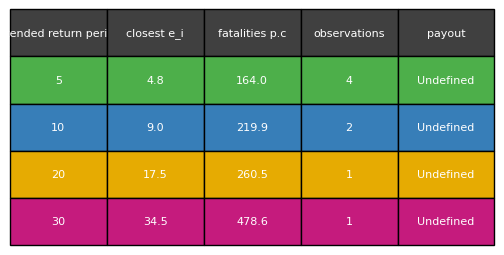

Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/1x1/table_png' already exists.


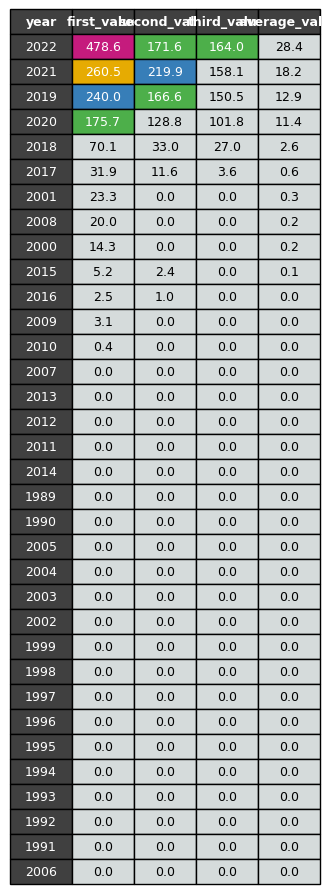

Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/plot_png' already exists.


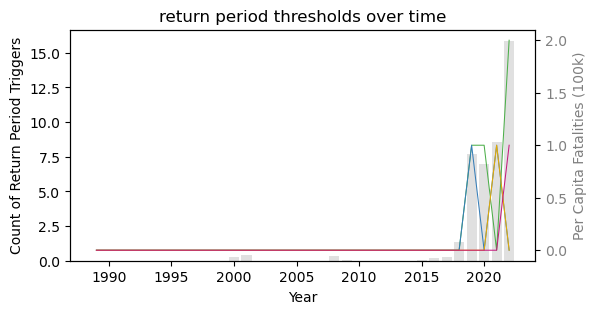

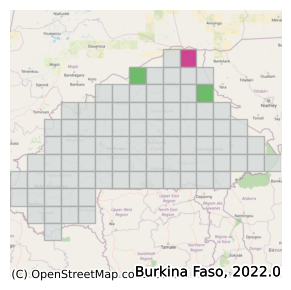

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 0 in 2022.0  with dimensions 3.50x3.50.png


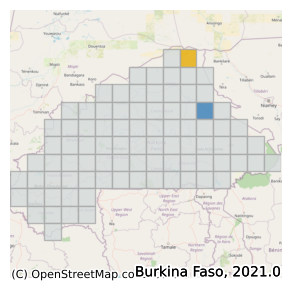

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 1 in 2021.0  with dimensions 3.50x3.50.png


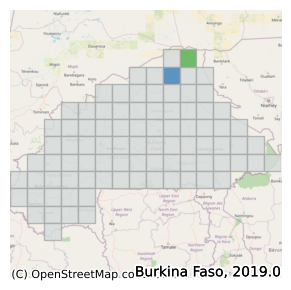

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 2 in 2019.0  with dimensions 3.50x3.50.png


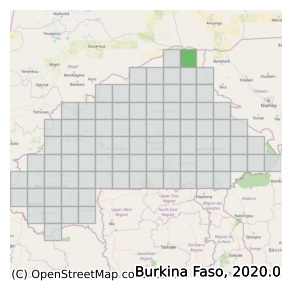

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 3 in 2020.0  with dimensions 3.50x3.50.png


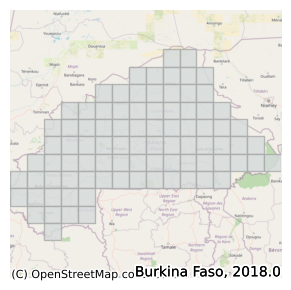

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 4 in 2018.0  with dimensions 3.50x3.50.png


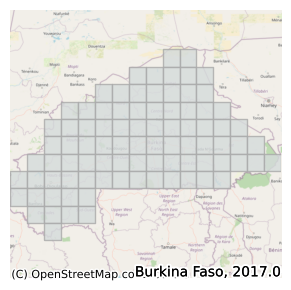

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 5 in 2017.0  with dimensions 3.50x3.50.png


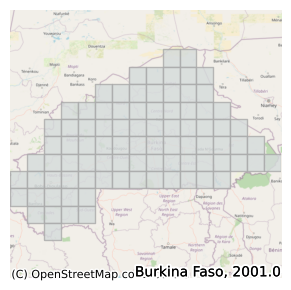

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 6 in 2001.0  with dimensions 3.50x3.50.png


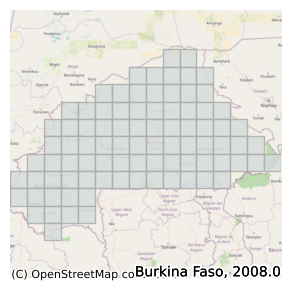

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 7 in 2008.0  with dimensions 3.50x3.50.png


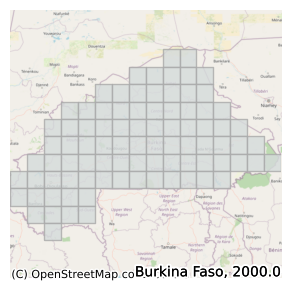

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 8 in 2000.0  with dimensions 3.50x3.50.png


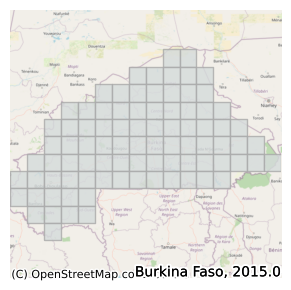

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 9 in 2015.0  with dimensions 3.50x3.50.png


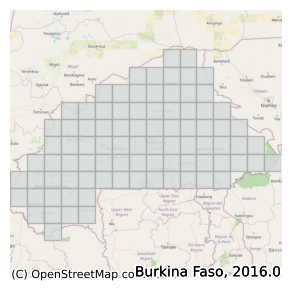

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 10 in 2016.0  with dimensions 3.50x3.50.png


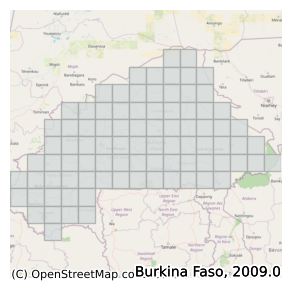

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 11 in 2009.0  with dimensions 3.50x3.50.png


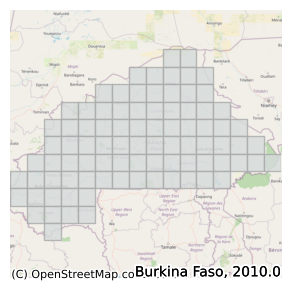

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 12 in 2010.0  with dimensions 3.50x3.50.png


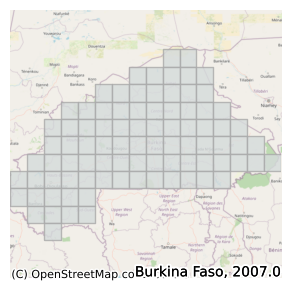

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 13 in 2007.0  with dimensions 3.50x3.50.png


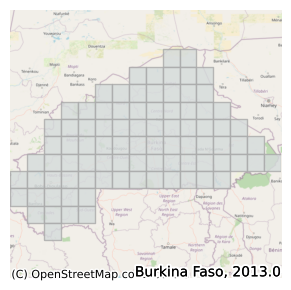

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 14 in 2013.0  with dimensions 3.50x3.50.png


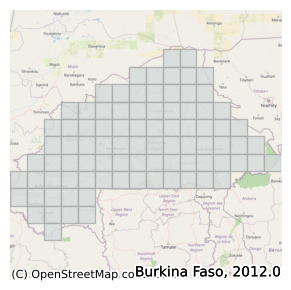

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 15 in 2012.0  with dimensions 3.50x3.50.png


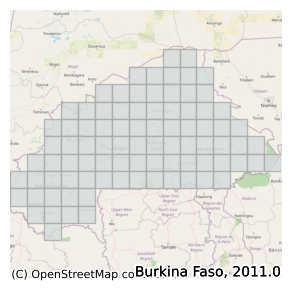

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 16 in 2011.0  with dimensions 3.50x3.50.png


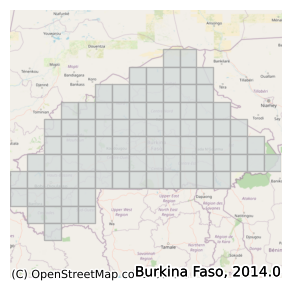

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 17 in 2014.0  with dimensions 3.50x3.50.png


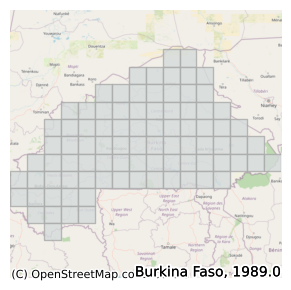

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 18 in 1989.0  with dimensions 3.50x3.50.png


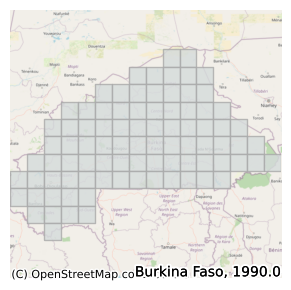

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 19 in 1990.0  with dimensions 3.50x3.50.png


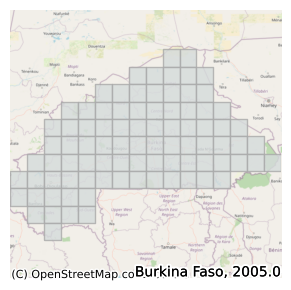

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 20 in 2005.0  with dimensions 3.50x3.50.png


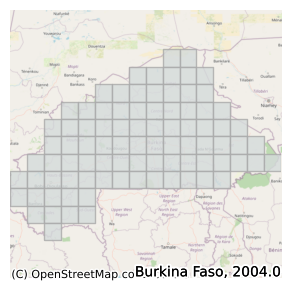

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 21 in 2004.0  with dimensions 3.50x3.50.png


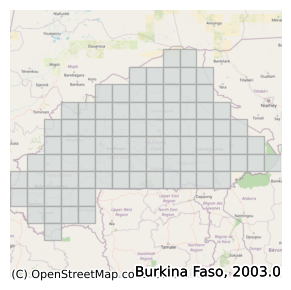

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 22 in 2003.0  with dimensions 3.50x3.50.png


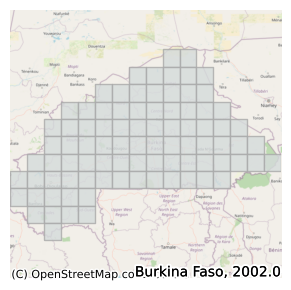

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 23 in 2002.0  with dimensions 3.50x3.50.png


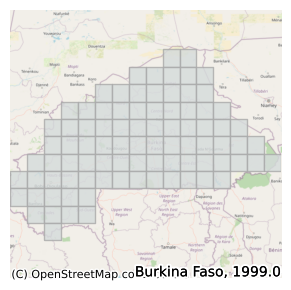

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 24 in 1999.0  with dimensions 3.50x3.50.png


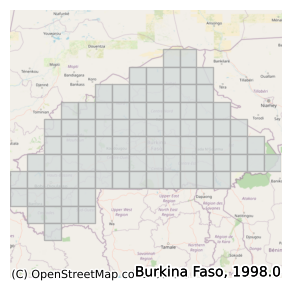

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 25 in 1998.0  with dimensions 3.50x3.50.png


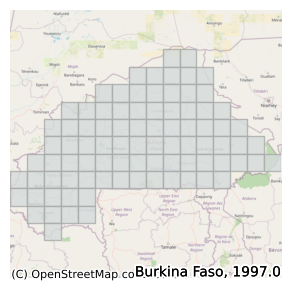

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 26 in 1997.0  with dimensions 3.50x3.50.png


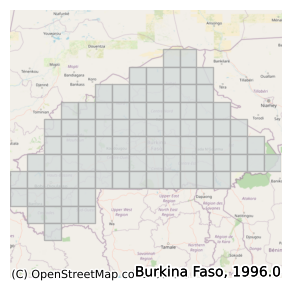

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 27 in 1996.0  with dimensions 3.50x3.50.png


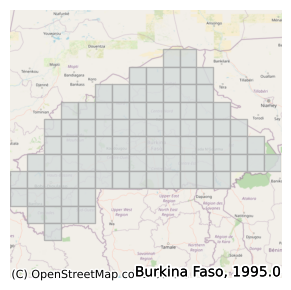

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 28 in 1995.0  with dimensions 3.50x3.50.png


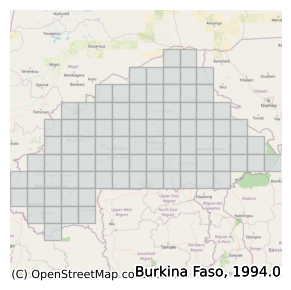

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 29 in 1994.0  with dimensions 3.50x3.50.png


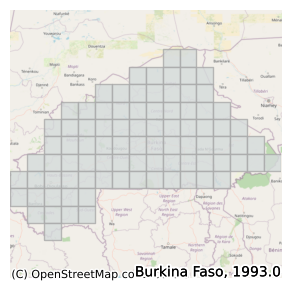

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 30 in 1993.0  with dimensions 3.50x3.50.png


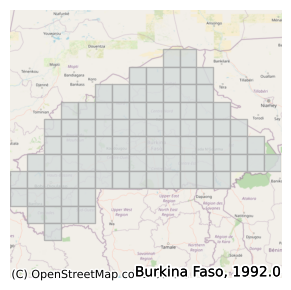

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 31 in 1992.0  with dimensions 3.50x3.50.png


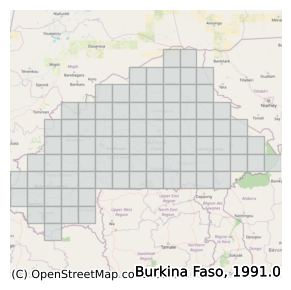

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 32 in 1991.0  with dimensions 3.50x3.50.png


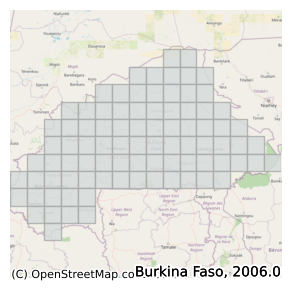

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/Burkina Faso conflict year 33 in 2006.0  with dimensions 3.50x3.50.png


In [37]:
#produces graphics, tables, and maps for the CELL TYPE RETURN PERIOD:
y_rows = y.shape[0]
#make the insurance table columns lowercase to keep in line with JPR standards:
z.columns = z.columns.str.lower()
print(z)
#-----This is setting up things to export a map---------------------------------------------------------------
sorted_annual_table = query_and_sort_annual_table(y, field_to_sort=sort_annual_report_by, number_of_rows=y_rows)
sorted_annual_table.iloc[:, 1:] = sorted_annual_table.iloc[:, 1:].round(1)

filtered_colors = filtered_info['Color'].tolist()
lineplot_colors = filtered_colors[1:]
image_save_returnperiodtable(z, color_scheme, insurance_attribute, country, method, return_period, aggregation=aggregation, figure_height=1.75, figure_width=2.5,) #input_table = Jerry_table
    #image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info_upto30, country, 'Aggregation', 'Cell', year_to_eval, '3', figure_height=3.5, figure_width=3.5)
plot_and_colorize_annual_table(sorted_annual_table, filtered_info, country, method, return_period, aggregation=aggregation, figure_height=5.5, figure_width=4.0)
plot_histogram_with_lineplot(x, filtered_info, country, method, return_period, aggregation=aggregation, value_field=value_field, labels_to_omit='Below 1 in 5 year', figure_height=3.0, figure_width=6.0)


gdf = retrieve_geodataframe(aggregation)
for annual_event in range(y_rows):
        year_to_eval = define_year_to_map(sorted_annual_table, annual_event)
        gdf_merged = query_geodataframe(gdf, x, year_to_eval, field=value_field)
        image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info, country, method, return_period, year_to_eval, aggregation, field=value_field, figure_height=3.5, figure_width=3.5, year_id=annual_event)

In [19]:
import pandas as pd
import os
from PIL import Image, ImageDraw, ImageFont

import os
import sys

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("The current Working Directory is:", current_directory)

# Get the path to the base directory (VIEWS_FAO_index)
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(f'The base directory will be set to: {base_dir}')

# Add the base directory to sys.path
sys.path.insert(0, base_dir)

from src.utils.universal_functions.setup.build_directory import ensure_directory_exists

def find_file_with_string(folder_path, search_string):
    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        # Check if the search_string is in the filename
        if search_string in filename:
            return filename
    return None


"""
This gives the formatting criteria for OPTION 2 Slides (1 & 2)
"""

def mapped_option2(country, method, returnperiodmethod, summary_text, aggregation='0'): 

    base_directory = os.getcwd()
    font_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/OpenSans-VariableFont.ttf'
    template_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/PRIO Layout A.png'
    template_image = Image.open(template_path)

    if aggregation == '1':
        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'map_png/'
        print(map_path)
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---
        output_path = base_directory + '/files/Layouts/' + country + '/' 

    else:
        aggregation_string = aggregation + 'x' + aggregation

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string   + '/' + 'map_png/'
        print(map_path)
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---
        output_path = base_directory + '/files/Layouts/' + country + '/' 


    ensure_directory_exists(output_path)

    #look for the graphic with the appropriate dimensions:
    #Map 1
    map_filename_0 = find_file_with_string(map_path, 'conflict year 0') # looking for a 3.5 x 3.5 map 
    print(map_filename_0)
    #Map 2
    map_filename_1 = find_file_with_string(map_path, 'conflict year 1') # looking for a 3.5 x 3.5 map
    print(map_filename_1)
    #Map 3
    map_filename_2 = find_file_with_string(map_path, 'conflict year 2') # looking for a 3.5 x 3.5 map
    print(map_filename_2)
    #Map 4
    map_filename_3 = find_file_with_string(map_path, 'conflict year 3') # looking for a 3.5 x 3.5 map
    print(map_filename_3)
    #Map 5
    map_filename_4 = find_file_with_string(map_path, 'conflict year 4') # looking for a 3.5 x 3.5 map
    print(map_filename_4)
    #Map 6
    map_filename_5 = find_file_with_string(map_path, 'conflict year 5') # looking for a 3.5 x 3.5 map
    print(map_filename_5)
    #Map 7
    map_filename_6 = find_file_with_string(map_path, 'conflict year 6') # looking for a 3.5 x 3.5 map
    print(map_filename_6)
    #Map 8
    map_filename_7 = find_file_with_string(map_path, 'conflict year 7') # looking for a 3.5 x 3.5 map
    print(map_filename_7)
    #Map 9
    map_filename_8 = find_file_with_string(map_path, 'conflict year 8') # looking for a 3.5 x 3.5 map
    print(map_filename_8)
    #Map 10
    map_filename_9 = find_file_with_string(map_path, 'conflict year 9') # looking for a 3.5 x 3.5 map
    print(map_filename_9)

    annual_table_filename = find_file_with_string(annual_table_path, '4.0x5.5') #  looking for a 2.5 x 1.75 map 4_0x5_5
    print(annual_table_filename)
    return_period_table_fileneame = find_file_with_string(return_period_table_path, '2.5x1.8')
    print(return_period_table_fileneame)
    return_period_lineplot_fileneame = find_file_with_string(return_period_lineplot_path, '6.0x3.0')
    print(return_period_lineplot_fileneame)



    # Load the template image
    #template_path = 'Slide 1 Option B Template.png'

    template_image = template_image.resize((1620, 915), Image.Resampling.LANCZOS)
    draw = ImageDraw.Draw(template_image)

    #template_image = Image.open(template_path)
    #draw = ImageDraw.Draw(template_image)

    # # Define grid parameters
    # grid_spacing = 50  # Adjust the spacing as needed
    # grid_color = "blue"
    # grid_width = 1

    # # Define the font for the grid labels
    # font = ImageFont.load_default()

    # # Get the dimensions of the template image
    # width, height = template_image.size

    # # Draw the grid
    # for x in range(0, width, grid_spacing):
    #     draw.line([(x, 0), (x, height)], fill=grid_color, width=grid_width)
    #     draw.text((x, 0), str(x), fill=grid_color, font=font)
    # for y in range(0, height, grid_spacing):
    #     draw.line([(0, y), (width, y)], fill=grid_color, width=grid_width)
    #     draw.text((0, y), str(y), fill=grid_color, font=font)

    # Define the positions and sizes for placeholders
    positions = [

        {'position': (425, 200), 'size': (400, 350), 'label': 'Rank 1','filename': map_filename_0, 'folder': map_path, 'font_size':9},      # Main Map

        {'position': (925, 175), 'size': (200, 200), 'label': 'Rank 2','filename': map_filename_1, 'folder': map_path, 'font_size': 9},       # Year 1
        {'position': (925, 400), 'size': (200, 200), 'label': 'Rank 5','filename': map_filename_4, 'folder': map_path, 'font_size':9},       # Year 1
        {'position': (925, 625), 'size': (200, 200), 'label': 'Rank 8','filename': map_filename_7, 'folder': map_path, 'font_size':9},       # Year 1
        {'position': (1150, 175), 'size': (200, 200), 'label': 'Rank 3','filename': map_filename_2, 'folder': map_path, 'font_size':9},       # Year 1
        {'position': (1150, 400), 'size': (200, 200), 'label': 'Rank 6','filename': map_filename_5, 'folder': map_path, 'font_size':9},       # Year 1
        {'position': (1150, 625), 'size': (200, 200), 'label': 'Rank 9','filename': map_filename_8, 'folder': map_path, 'font_size':9},       # Year 1
        {'position': (1375, 175), 'size': (200, 200), 'label': 'Rank 4','filename': map_filename_3, 'folder': map_path, 'font_size':9},       # Year 1
        {'position': (1375, 400), 'size': (200, 200), 'label': 'Rank 7','filename': map_filename_6, 'folder': map_path, 'font_size':9},       # Year 1
        {'position': (1375, 625), 'size': (200, 200), 'label': 'Rank 10','filename': map_filename_9, 'folder': map_path, 'font_size':9},       # Year 1

        {'position': (425, 625), 'size': (400, 200), 'label': '','filename': return_period_table_fileneame, 'folder': return_period_table_path,'font_size':1},     # Payout Legend 
       
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Legend'},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Legend'},     # Payout Legend Title

    ]

        # Define the positions and sizes for text boxes
    text_boxes = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        {'position': (65, 215), 'size': (270, 325), 'label':  summary_text,'font_size': 15}
    ]

    title = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        {'position': (50, 25), 'size': (600, 125), 'label':  country, 'font_size': 92}
    ]

    title_boxes = [
        {'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        {'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        {'position': (50, 200), 'size': (300, 350), 'label': '','font_size': 32},     # empty text box

        #{'position': (50, 175), 'size': (300, 500), 'label':  summary_text,'font_size': 14}
    ]

        # # Load and paste the images onto the template
    for pos in positions:
        if 'folder' in pos and 'filename' in pos:
                img_path = os.path.join(pos['folder'], pos['filename'])
                if os.path.exists(img_path):
                    img = Image.open(img_path)
                    img = img.resize(pos['size'], Image.Resampling.LANCZOS)
                    template_image.paste(img, pos['position'])
                else:
                    print(f"Image {pos['filename']} not found in {pos['folder']}")
        else:
                print(f"Missing 'folder' or 'filename' in: {pos}")

# Add text boxes
    # Add text boxes
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    for title_b in title_boxes:
        x, y = title_b['position']
        w, h = title_b['size']
        label = title_b['label']
        font_size = title_b['font_size']  # Get the font size from the dictionary

            # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    #     Draw a rectangle around the text box area with a dark grey background
        draw.rectangle([x, y, x + w, y + h], fill="darkgrey", outline="black", width=2)

    #     # Calculate the bounding box of the text
        text_bbox = draw.textbbox((0, 0), label, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

         # Calculate the position to center the text
        text_x = x + (w - text_width) / 2
        text_y = y + (h - text_height) / 3

    #     # Draw the text centered in the box with white color
        draw.text((text_x, text_y), label, fill="white", font=font)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------
    for t in title:
        x, y = t['position']
        w, h = t['size']
        label = t['label']
        font_size = t['font_size']  # Get the font size from the dictionary

        # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

        # Draw a rectangle around the text box area with a dark grey background
        #draw.rectangle([x, y, x + w, y + h], fill="grey", outline="white", width=2)
        #draw.rectangle([x, y, x + w, y + h])

        # Wrap the text to fit inside the box
        wrapped_text = []
        words = label.split()
        line = ""

        for word in words:
            # Add the word to the line and check if it fits
            test_line = line + word + " "
            text_bbox = draw.textbbox((0, 0), test_line, font=font)
            test_width = text_bbox[2] - text_bbox[0]

            if test_width <= w:
                line = test_line
            else:
                # If the line is too long, add the current line to wrapped_text and start a new line
                wrapped_text.append(line.strip())
                line = word + " "

        # Add the last line
        wrapped_text.append(line.strip())

        # Draw the text line by line, adjusting the position
        current_y = y
        for line in wrapped_text:
            draw.text((x, current_y), line, fill="black", font=font)
            current_y += font_size  # Move to the next line

        # Ensure that the text doesn't overflow the box height
        if current_y > y + h:
            print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    for box in text_boxes:
        x, y = box['position']
        w, h = box['size']
        label = box['label']
        font_size = box['font_size']  # Get the font size from the dictionary

        # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

        # Draw a rectangle around the text box area with a dark grey background
        #draw.rectangle([x, y, x + w, y + h], fill="white", outline="white", width=2)
        #draw.rectangle([x, y, x + w, y + h])

        # Wrap the text to fit inside the box
        wrapped_text = []
        words = label.split()
        line = ""

        for word in words:
            # Add the word to the line and check if it fits
            test_line = line + word + " "
            text_bbox = draw.textbbox((0, 0), test_line, font=font)
            test_width = text_bbox[2] - text_bbox[0]

            if test_width <= w:
                line = test_line
            else:
                # If the line is too long, add the current line to wrapped_text and start a new line
                wrapped_text.append(line.strip())
                line = word + " "

        # Add the last line
        wrapped_text.append(line.strip())

        # Draw the text line by line, adjusting the position
        current_y = y
        for line in wrapped_text:
            draw.text((x, current_y), line, fill="black", font=font)
            current_y += font_size  # Move to the next line

        # Ensure that the text doesn't overflow the box height
        if current_y > y + h:
            print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")

#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         

    # Draw rectangles at specified positions
    for pos in positions:
        x, y = pos['position']
        w, h = pos['size']
        draw.rectangle([x, y, x + w, y + h], outline="black", width=3)
        draw.text((x, y - 20), pos['label'], fill="black")
        font_size = pos['font_size']  # Get the font size from the dictionary

        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    # Save and show the template with marked positions
    #marked_template_path = '/Users/gbenz/Desktop/tmp.png'
            
        # Save the final image with a specified filename
            

    output_filename = os.path.join(output_path, f'{country}_{method}_{returnperiodmethod}_{aggregation}x{aggregation}.png')
    template_image.save(output_filename)
    template_image.show()

The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index


In [20]:
import pandas as pd
import os
from PIL import Image, ImageDraw, ImageFont

import os
import sys

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("The current Working Directory is:", current_directory)

# Get the path to the base directory (VIEWS_FAO_index)
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(f'The base directory will be set to: {base_dir}')

# Add the base directory to sys.path
sys.path.insert(0, base_dir)

from src.utils.universal_functions.setup.build_directory import ensure_directory_exists

def find_file_with_string(folder_path, search_string):
    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        # Check if the search_string is in the filename
        if search_string in filename:
            return filename
    return None


"""
This gives the formatting criteria for OPTION 2 Slides (1 & 2)
"""

def mapped_option3(country, method, returnperiodmethod, summary_text, aggregation='0'): 

    base_directory = os.getcwd()
    font_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/OpenSans-VariableFont.ttf'
    template_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/PRIO Layout Method 3.png'
    template_image = Image.open(template_path)


    if aggregation == '1':
        aggregation_string = aggregation + 'x' + aggregation

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'map_png/'
        print(map_path)
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + aggregation_string + '/table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---
        output_path = base_directory + '/files/Layouts/' + country + '/' 

    else:
        aggregation_string = aggregation + 'x' + aggregation

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string   + '/' + 'map_png/'
        print(map_path)
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---
        output_path = base_directory + '/files/Layouts/' + country + '/' 


    ensure_directory_exists(output_path)

    #look for the graphic with the appropriate dimensions:
    #Map 1
    map_filename_0 = find_file_with_string(map_path, 'conflict year 0') # looking for a 3.5 x 3.5 map 
    print(map_filename_0)
    #Map 2
    map_filename_1 = find_file_with_string(map_path, 'conflict year 1') # looking for a 3.5 x 3.5 map
    print(map_filename_1)
    #Map 3
    map_filename_2 = find_file_with_string(map_path, 'conflict year 2') # looking for a 3.5 x 3.5 map
    print(map_filename_2)
    #Map 4
    map_filename_3 = find_file_with_string(map_path, 'conflict year 3') # looking for a 3.5 x 3.5 map
    print(map_filename_3)
    #Map 5
    map_filename_4 = find_file_with_string(map_path, 'conflict year 4') # looking for a 3.5 x 3.5 map
    print(map_filename_4)
    #Map 6
    map_filename_5 = find_file_with_string(map_path, 'conflict year 5') # looking for a 3.5 x 3.5 map
    print(map_filename_5)
    #Map 7
    map_filename_6 = find_file_with_string(map_path, 'conflict year 6') # looking for a 3.5 x 3.5 map
    print(map_filename_6)
    #Map 8
    map_filename_7 = find_file_with_string(map_path, 'conflict year 7') # looking for a 3.5 x 3.5 map
    print(map_filename_7)
    #Map 9
    map_filename_8 = find_file_with_string(map_path, 'conflict year 8') # looking for a 3.5 x 3.5 map
    print(map_filename_8)
    #Map 10
    map_filename_9 = find_file_with_string(map_path, 'conflict year 9') # looking for a 3.5 x 3.5 map
    print(map_filename_9)

    annual_table_filename = find_file_with_string(annual_table_path, '4.0x5.5') #  looking for a 2.5 x 1.75 map 4_0x5_5
    print(annual_table_filename)
    return_period_table_fileneame = find_file_with_string(return_period_table_path, '2.5x1.8')
    print(return_period_table_fileneame)
    return_period_lineplot_fileneame = find_file_with_string(return_period_lineplot_path, '6.0x3.0')
    print(return_period_lineplot_fileneame)



    # Load the template image
    #template_path = 'Slide 1 Option B Template.png'

    template_image = template_image.resize((1620, 915), Image.Resampling.LANCZOS)
    draw = ImageDraw.Draw(template_image)



    # Define grid parameters
    grid_spacing = 50  # Adjust the spacing as needed
    grid_color = "blue"
    grid_width = 1

    # Define the font for the grid labels
    font = ImageFont.load_default()

    # Get the dimensions of the template image
    width, height = template_image.size

    # Draw the grid
    for x in range(0, width, grid_spacing):
        draw.line([(x, 0), (x, height)], fill=grid_color, width=grid_width)
        draw.text((x, 0), str(x), fill=grid_color, font=font)
    for y in range(0, height, grid_spacing):
        draw.line([(0, y), (width, y)], fill=grid_color, width=grid_width)
        draw.text((0, y), str(y), fill=grid_color, font=font)

    # Define the positions and sizes for placeholders
    positions = [


        {'position': (750, 75), 'size': (350, 350), 'label': 'Rank 2','filename': map_filename_1, 'folder': map_path, 'font_size': 9},       # Year 1
        {'position': (1200, 75), 'size': (350, 350), 'label': 'Rank 5','filename': map_filename_4, 'folder': map_path, 'font_size':9},       # Year 1
        {'position': (750, 500), 'size': (350, 350), 'label': 'Rank 8','filename': map_filename_7, 'folder': map_path, 'font_size':9},       # Year 1
        {'position': (1200, 500), 'size': (350, 350), 'label': 'Rank 3','filename': map_filename_2, 'folder': map_path, 'font_size':9},       # Year 1

        {'position': (50, 225), 'size': (500, 250), 'label': '','filename': return_period_table_fileneame, 'folder': return_period_table_path,'font_size':1},     # Payout Legend 
       
        {'position': (375, 500), 'size': (250, 375), 'label': '','filename': annual_table_filename, 'folder': annual_table_path,'font_size':1},     # Payout Legend 

        #{'position': (425, 575), 'size': (400, 50), 'label': 'Legend'},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Legend'},     # Payout Legend Title

    ]

        # Define the positions and sizes for text boxes
    text_boxes = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        #{'position': (65, 215), 'size': (270, 325), 'label':  summary_text,'font_size': 15}
    ]

    title = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        {'position': (50, 25), 'size': (600, 125), 'label':  country, 'font_size': 92}
    ]

    title_boxes = [
        {'position': (50, 165), 'size': (525, 35), 'label': 'Payout Legend','font_size': 18},     # Payout Legend Title
        {'position': (750, 25), 'size': (800, 35), 'label': 'Top Conflict Years','font_size': 24},     # Payout Legend Title
        {'position': (750, 450), 'size': (800, 35), 'label': 'Top Conflict Years','font_size': 24},     # Payout Legend Title
        #{'position': (50, 200), 'size': (300, 350), 'label': '','font_size': 32},     # empty text box

        #{'position': (50, 175), 'size': (300, 500), 'label':  summary_text,'font_size': 14}
    ]

        # # Load and paste the images onto the template
    for pos in positions:
        if 'folder' in pos and 'filename' in pos:
                img_path = os.path.join(pos['folder'], pos['filename'])
                if os.path.exists(img_path):
                    img = Image.open(img_path)
                    img = img.resize(pos['size'], Image.Resampling.LANCZOS)
                    template_image.paste(img, pos['position'])
                else:
                    print(f"Image {pos['filename']} not found in {pos['folder']}")
        else:
                print(f"Missing 'folder' or 'filename' in: {pos}")

# Add text boxes
    # Add text boxes
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    for title_b in title_boxes:
        x, y = title_b['position']
        w, h = title_b['size']
        label = title_b['label']
        font_size = title_b['font_size']  # Get the font size from the dictionary

            # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    #     Draw a rectangle around the text box area with a dark grey background
        draw.rectangle([x, y, x + w, y + h], fill="darkgrey", outline="black", width=2)

    #     # Calculate the bounding box of the text
        text_bbox = draw.textbbox((0, 0), label, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

         # Calculate the position to center the text
        text_x = x + (w - text_width) / 2
        text_y = y + (h - text_height) / 3

    #     # Draw the text centered in the box with white color
        draw.text((text_x, text_y), label, fill="white", font=font)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------
    for t in title:
        x, y = t['position']
        w, h = t['size']
        label = t['label']
        font_size = t['font_size']  # Get the font size from the dictionary

        # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

        # Draw a rectangle around the text box area with a dark grey background
        #draw.rectangle([x, y, x + w, y + h], fill="grey", outline="white", width=2)
        #draw.rectangle([x, y, x + w, y + h])

        # Wrap the text to fit inside the box
        wrapped_text = []
        words = label.split()
        line = ""

        for word in words:
            # Add the word to the line and check if it fits
            test_line = line + word + " "
            text_bbox = draw.textbbox((0, 0), test_line, font=font)
            test_width = text_bbox[2] - text_bbox[0]

            if test_width <= w:
                line = test_line
            else:
                # If the line is too long, add the current line to wrapped_text and start a new line
                wrapped_text.append(line.strip())
                line = word + " "

        # Add the last line
        wrapped_text.append(line.strip())

        # Draw the text line by line, adjusting the position
        current_y = y
        for line in wrapped_text:
            draw.text((x, current_y), line, fill="black", font=font)
            current_y += font_size  # Move to the next line

        # Ensure that the text doesn't overflow the box height
        if current_y > y + h:
            print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    # for box in text_boxes:
    #     x, y = box['position']
    #     w, h = box['size']
    #     label = box['label']
    #     font_size = box['font_size']  # Get the font size from the dictionary

    #     # Create a font object with the specified size
    #     try:
    #         font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
    #     except IOError:
    #         font = ImageFont.load_default()

    #     # Draw a rectangle around the text box area with a dark grey background
    #     #draw.rectangle([x, y, x + w, y + h], fill="white", outline="white", width=2)
    #     #draw.rectangle([x, y, x + w, y + h])

    #     # Wrap the text to fit inside the box
    #     wrapped_text = []
    #     words = label.split()
    #     line = ""

    #     for word in words:
    #         # Add the word to the line and check if it fits
    #         test_line = line + word + " "
    #         text_bbox = draw.textbbox((0, 0), test_line, font=font)
    #         test_width = text_bbox[2] - text_bbox[0]

    #         if test_width <= w:
    #             line = test_line
    #         else:
    #             # If the line is too long, add the current line to wrapped_text and start a new line
    #             wrapped_text.append(line.strip())
    #             line = word + " "

    #     # Add the last line
    #     wrapped_text.append(line.strip())

    #     # Draw the text line by line, adjusting the position
    #     current_y = y
    #     for line in wrapped_text:
    #         draw.text((x, current_y), line, fill="black", font=font)
    #         current_y += font_size  # Move to the next line

    #     # Ensure that the text doesn't overflow the box height
    #     if current_y > y + h:
    #         print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")

#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         

    #Draw rectangles at specified positions
    for pos in positions:
        x, y = pos['position']
        w, h = pos['size']
        draw.rectangle([x, y, x + w, y + h], outline="black", width=3)
        draw.text((x, y - 20), pos['label'], fill="black")
        font_size = pos['font_size']  # Get the font size from the dictionary

        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    # Save and show the template with marked positions
    #marked_template_path = '/Users/gbenz/Desktop/tmp.png'
            
        # Save the final image with a specified filename
            

    output_filename = os.path.join(output_path, f'{country}_{method}_{returnperiodmethod}_{aggregation}x{aggregation}.png')
    template_image.save(output_filename)
    template_image.show()

The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index


In [21]:
import pandas as pd
import os
from PIL import Image, ImageDraw, ImageFont

import os
import sys

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("The current Working Directory is:", current_directory)

# Get the path to the base directory (VIEWS_FAO_index)
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(f'The base directory will be set to: {base_dir}')

# Add the base directory to sys.path
sys.path.insert(0, base_dir)

from src.utils.universal_functions.setup.build_directory import ensure_directory_exists

def find_file_with_string(folder_path, search_string):
    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        # Check if the search_string is in the filename
        if search_string in filename:
            return filename
    return None


"""
This gives the formatting criteria for OPTION 2 Slides (1 & 2)
"""

def mapped_option4(country, method, returnperiodmethod, aggregation='0', gridlines='no'): 

    base_directory = os.getcwd()
    font_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/OpenSans-VariableFont.ttf'
    template_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/PRIO Layout Method 3_1.png'
    template_image = Image.open(template_path)


    if aggregation == '1':
        aggregation_string = aggregation + 'x' + aggregation

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'map_png/'
        print(map_path)
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + aggregation_string + '/table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---
        output_path = base_directory + '/files/Layouts/' + country + '/' 

    else:
        aggregation_string = aggregation + 'x' + aggregation

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string   + '/' + 'map_png/'
        print(map_path)
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---
        output_path = base_directory + '/files/Layouts/' + country + '/' 


    ensure_directory_exists(output_path)

    #look for the graphic with the appropriate dimensions:
    #Map 1
    map_filename_0 = find_file_with_string(map_path, 'conflict year 0') # looking for a 3.5 x 3.5 map 
    print(f'located map rank1: {map_filename_0}')
    #Map 2
    map_filename_1 = find_file_with_string(map_path, 'conflict year 1 ') # looking for a 3.5 x 3.5 map
    print(f'located map rank 2: {map_filename_1}')
    #Map 3
    map_filename_2010 = find_file_with_string(map_path, '2010') # looking for a 3.5 x 3.5 map
    print(map_filename_2010)
    #Map 4
    map_filename_2020 = find_file_with_string(map_path, '2020') # looking for a 3.5 x 3.5 map
    print(map_filename_2020)
    #Map 5
    #Map 6


    annual_table_filename = find_file_with_string(annual_table_path, '4.0x5.5') #  looking for a 2.5 x 1.75 map 4_0x5_5
    print(f'located lineplot file in folder: {annual_table_filename}')

    return_period_table_fileneame = find_file_with_string(return_period_table_path, '2.5x1.8')
    print(f'located lineplot file in folder: {return_period_table_fileneame}')
    
    return_period_lineplot_fileneame = find_file_with_string(return_period_lineplot_path, '6.0x3.0')
    print(f'located lineplot file in folder: {return_period_lineplot_fileneame}')



    # Load the template image
    #template_path = 'Slide 1 Option B Template.png'

    template_image = template_image.resize((1620, 915), Image.Resampling.LANCZOS)
    draw = ImageDraw.Draw(template_image)



    # Define grid parameters
    grid_spacing = 50  # Adjust the spacing as needed
    grid_color = "blue"
    grid_width = 1

    # Define the font for the grid labels
    font = ImageFont.load_default()

    # Get the dimensions of the template image
    width, height = template_image.size

    if gridlines == 'yes':
    # Draw the grid
        for x in range(0, width, grid_spacing):
            draw.line([(x, 0), (x, height)], fill=grid_color, width=grid_width)
            draw.text((x, 0), str(x), fill=grid_color, font=font)
        for y in range(0, height, grid_spacing):
            draw.line([(0, y), (width, y)], fill=grid_color, width=grid_width)
            draw.text((0, y), str(y), fill=grid_color, font=font)

    # Define the positions and sizes for placeholders
    positions = [

#These are the top 2 Conflict years
        {'position': (765, 110), 'size': (325, 325), 'label': '','filename': map_filename_0, 'folder': map_path, 'font_size': 9, 'line_width': 3},       # Year 1
        {'position': (1215, 110), 'size': (325, 325), 'label': '','filename': map_filename_1, 'folder': map_path, 'font_size':9,'line_width': 3},       # Year 1
        
#These are the selected conflict years
        {'position': (765, 505), 'size': (325, 325), 'label': '','filename': map_filename_2010, 'folder': map_path, 'font_size':9, 'line_width': 3},       # Year 1
        {'position': (1215, 505), 'size': (325, 325), 'label': '','filename': map_filename_2020, 'folder': map_path, 'font_size':9, 'line_width': 3},       # Year 1

        {'position': (50, 225), 'size': (550, 275), 'label': '','filename': return_period_table_fileneame, 'folder': return_period_table_path,'font_size':1, 'line_width': 3},     # Payout Legend 
       
        #{'position': (375, 500), 'size': (250, 375), 'label': '','filename': annual_table_filename, 'folder': annual_table_path,'font_size':1},     # Payout Legend 
        {'position': (50, 550), 'size': (550, 300), 'label': '','filename': return_period_lineplot_fileneame, 'folder': return_period_lineplot_path,'font_size':1, 'line_width': 0},     # Payout Legend 

        #{'position': (425, 575), 'size': (400, 50), 'label': 'Legend'},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Legend'},     # Payout Legend Title

    ]

        # Define the positions and sizes for text boxes
    text_boxes = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        #{'position': (65, 215), 'size': (270, 325), 'label':  summary_text,'font_size': 15}
    ]

    title = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        {'position': (50, 25), 'size': (600, 125), 'label':  country, 'font_size': 92}
    ]

    title_boxes = [
        {'position': (50, 175), 'size': (550, 35), 'label': 'Payout Legend','font_size': 18},     # Payout Legend Title
        #{'position': (750, 25), 'size': (800, 35), 'label': 'Top Conflict Years','font_size': 24},     # Payout Legend Title
        #{'position': (750, 450), 'size': (800, 35), 'label': 'Selected Conflict Years','font_size': 24},     # Payout Legend Title
        #{'position': (50, 200), 'size': (300, 350), 'label': '','font_size': 32},     # empty text box

        #{'position': (50, 175), 'size': (300, 500), 'label':  summary_text,'font_size': 14}
    ]

        # # Load and paste the images onto the template
    for pos in positions:
        if 'folder' in pos and 'filename' in pos:
                img_path = os.path.join(pos['folder'], pos['filename'])
                if os.path.exists(img_path):
                    img = Image.open(img_path)
                    img = img.resize(pos['size'], Image.Resampling.LANCZOS)
                    template_image.paste(img, pos['position'])
                else:
                    print(f"Image {pos['filename']} not found in {pos['folder']}")
        else:
                print(f"Missing 'folder' or 'filename' in: {pos}")

# Add text boxes
    # Add text boxes
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    for title_b in title_boxes:
        x, y = title_b['position']
        w, h = title_b['size']
        label = title_b['label']
        font_size = title_b['font_size']  # Get the font size from the dictionary

            # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    #     Draw a rectangle around the text box area with a dark grey background
        draw.rectangle([x, y, x + w, y + h], fill="darkgrey", outline="black", width=2)

    #     # Calculate the bounding box of the text
        text_bbox = draw.textbbox((0, 0), label, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

         # Calculate the position to center the text
        text_x = x + (w - text_width) / 2
        text_y = y + (h - text_height) / 3

    #     # Draw the text centered in the box with white color
        draw.text((text_x, text_y), label, fill="white", font=font)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------
    for t in title:
        x, y = t['position']
        w, h = t['size']
        label = t['label']
        font_size = t['font_size']  # Get the font size from the dictionary

        # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

        # Draw a rectangle around the text box area with a dark grey background
        #draw.rectangle([x, y, x + w, y + h], fill="grey", outline="white", width=2)
        #draw.rectangle([x, y, x + w, y + h])

        # Wrap the text to fit inside the box
        wrapped_text = []
        words = label.split()
        line = ""

        for word in words:
            # Add the word to the line and check if it fits
            test_line = line + word + " "
            text_bbox = draw.textbbox((0, 0), test_line, font=font)
            test_width = text_bbox[2] - text_bbox[0]

            if test_width <= w:
                line = test_line
            else:
                # If the line is too long, add the current line to wrapped_text and start a new line
                wrapped_text.append(line.strip())
                line = word + " "

        # Add the last line
        wrapped_text.append(line.strip())

        # Draw the text line by line, adjusting the position
        current_y = y
        for line in wrapped_text:
            draw.text((x, current_y), line, fill="black", font=font)
            current_y += font_size  # Move to the next line

        # Ensure that the text doesn't overflow the box height
        if current_y > y + h:
            print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    # for box in text_boxes:
    #     x, y = box['position']
    #     w, h = box['size']
    #     label = box['label']
    #     font_size = box['font_size']  # Get the font size from the dictionary

    #     # Create a font object with the specified size
    #     try:
    #         font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
    #     except IOError:
    #         font = ImageFont.load_default()

    #     # Draw a rectangle around the text box area with a dark grey background
    #     #draw.rectangle([x, y, x + w, y + h], fill="white", outline="white", width=2)
    #     #draw.rectangle([x, y, x + w, y + h])

    #     # Wrap the text to fit inside the box
    #     wrapped_text = []
    #     words = label.split()
    #     line = ""

    #     for word in words:
    #         # Add the word to the line and check if it fits
    #         test_line = line + word + " "
    #         text_bbox = draw.textbbox((0, 0), test_line, font=font)
    #         test_width = text_bbox[2] - text_bbox[0]

    #         if test_width <= w:
    #             line = test_line
    #         else:
    #             # If the line is too long, add the current line to wrapped_text and start a new line
    #             wrapped_text.append(line.strip())
    #             line = word + " "

    #     # Add the last line
    #     wrapped_text.append(line.strip())

    #     # Draw the text line by line, adjusting the position
    #     current_y = y
    #     for line in wrapped_text:
    #         draw.text((x, current_y), line, fill="black", font=font)
    #         current_y += font_size  # Move to the next line

    #     # Ensure that the text doesn't overflow the box height
    #     if current_y > y + h:
    #         print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")

#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         

    #Draw rectangles at specified positions
    for pos in positions:
        x, y = pos['position']
        w, h = pos['size']
        line_width = pos['line_width']  # Get the line width from the dictionary
        draw.rectangle([x, y, x + w, y + h], outline="black", width=line_width)
        draw.text((x, y - 20), pos['label'], fill="black")
        font_size = pos['font_size']  # Get the font size from the dictionary

        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    # Save and show the template with marked positions
    #marked_template_path = '/Users/gbenz/Desktop/tmp.png'
            
        # Save the final image with a specified filename
            

    output_filename = os.path.join(output_path, f'{country}_{method}_{returnperiodmethod}_{aggregation}x{aggregation}.png')
    template_image.save(output_filename)
    template_image.show()

The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index


In [61]:
import pandas as pd
import os
from PIL import Image, ImageDraw, ImageFont

import os
import sys

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("The current Working Directory is:", current_directory)

# Get the path to the base directory (VIEWS_FAO_index)
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(f'The base directory will be set to: {base_dir}')

# Add the base directory to sys.path
sys.path.insert(0, base_dir)

from src.utils.universal_functions.setup.build_directory import ensure_directory_exists

def find_file_with_string(folder_path, search_string):
    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        # Check if the search_string is in the filename
        if search_string in filename:
            return filename
    return None


"""
This gives the formatting criteria for OPTION 2 Slides (1 & 2)
"""

def mapped_option5(country, method, returnperiodmethod, aggregation='0', gridlines='no'): 

    base_directory = os.getcwd()
    font_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/OpenSans-VariableFont.ttf'
    template_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/PRIO Layout Method 3_1.png'
    template_image = Image.open(template_path)


    if aggregation == '1':
        aggregation_string = aggregation + 'x' + aggregation

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'map_png/'
        print(map_path)
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + aggregation_string + '/table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---
        output_path = base_directory + '/files/Layouts/' + country + '/' 

    else:
        aggregation_string = aggregation + 'x' + aggregation

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string   + '/' + 'map_png/'
        print(map_path)
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---
        output_path = base_directory + '/files/Layouts/' + country + '/' 


    ensure_directory_exists(output_path)

    #look for the graphic with the appropriate dimensions:
    #Map 1
    map_filename_0 = find_file_with_string(map_path, 'conflict year 0') # looking for a 3.5 x 3.5 map 
    print(f'located map rank1: {map_filename_0}')
    #Map 2
    map_filename_1 = find_file_with_string(map_path, 'conflict year 1 ') # looking for a 3.5 x 3.5 map
    print(f'located map rank 2: {map_filename_1}')

    map_filename_2 = find_file_with_string(map_path, 'conflict year 2 ') # looking for a 3.5 x 3.5 map
    print(f'located map rank 3: {map_filename_2}')

    #Map 3
    map_filename_2010 = find_file_with_string(map_path, '2010') # looking for a 3.5 x 3.5 map
    print(map_filename_2010)
    #Map 4
    map_filename_2020 = find_file_with_string(map_path, '2020') # looking for a 3.5 x 3.5 map
    print(map_filename_2020)

    map_filename_2000 = find_file_with_string(map_path, '2000') # looking for a 3.5 x 3.5 map
    print(map_filename_2000)
    #Map 5
    #Map 6


    annual_table_filename = find_file_with_string(annual_table_path, '4.0x5.5') #  looking for a 2.5 x 1.75 map 4_0x5_5
    print(f'located lineplot file in folder: {annual_table_filename}')

    return_period_table_fileneame = find_file_with_string(return_period_table_path, '2.5x1.8')
    print(f'located lineplot file in folder: {return_period_table_fileneame}')
    
    return_period_lineplot_fileneame = find_file_with_string(return_period_lineplot_path, '6.0x3.0')
    print(f'located lineplot file in folder: {return_period_lineplot_fileneame}')



    # Load the template image
    #template_path = 'Slide 1 Option B Template.png'

    template_image = template_image.resize((1620, 915), Image.Resampling.LANCZOS)
    draw = ImageDraw.Draw(template_image)



    # Define grid parameters
    grid_spacing = 50  # Adjust the spacing as needed
    grid_color = "blue"
    grid_width = 1

    # Define the font for the grid labels
    font = ImageFont.load_default()

    # Get the dimensions of the template image
    width, height = template_image.size

    if gridlines == 'yes':
    # Draw the grid
        for x in range(0, width, grid_spacing):
            draw.line([(x, 0), (x, height)], fill=grid_color, width=grid_width)
            draw.text((x, 0), str(x), fill=grid_color, font=font)
        for y in range(0, height, grid_spacing):
            draw.line([(0, y), (width, y)], fill=grid_color, width=grid_width)
            draw.text((0, y), str(y), fill=grid_color, font=font)

    # Define the positions and sizes for placeholders
    positions = [

#These are the top 2 Conflict years
        {'position': (745, 110), 'size': (265, 275), 'label': '','filename': map_filename_0, 'folder': map_path, 'font_size': 9, 'line_width': 3},       # Year 1
        {'position': (1025, 110), 'size': (265, 275), 'label': '','filename': map_filename_1, 'folder': map_path, 'font_size':9,'line_width': 3},       # Year 1
        {'position': (1305, 110), 'size': (275, 275), 'label': '','filename': map_filename_2, 'folder': map_path, 'font_size':9,'line_width': 3},       # Year 1

#These are the selected conflict years
        {'position': (745, 505), 'size': (265, 275), 'label': '','filename': map_filename_2000, 'folder': map_path, 'font_size':9, 'line_width': 3},       # Year 1
        {'position': (1025, 505), 'size': (265, 275), 'label': '','filename': map_filename_2010, 'folder': map_path, 'font_size':9, 'line_width': 3},       # Year 1
        {'position': (1305, 505), 'size': (265, 275), 'label': '','filename': map_filename_2020, 'folder': map_path, 'font_size':9, 'line_width': 3},       # Year 1


        {'position': (50, 225), 'size': (550, 275), 'label': '','filename': return_period_table_fileneame, 'folder': return_period_table_path,'font_size':1, 'line_width': 3},     # Payout Legend 
       
        #{'position': (375, 500), 'size': (250, 375), 'label': '','filename': annual_table_filename, 'folder': annual_table_path,'font_size':1},     # Payout Legend 
        {'position': (50, 550), 'size': (550, 300), 'label': '','filename': return_period_lineplot_fileneame, 'folder': return_period_lineplot_path,'font_size':1, 'line_width': 0},     # Payout Legend 

        #{'position': (425, 575), 'size': (400, 50), 'label': 'Legend'},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Legend'},     # Payout Legend Title

    ]

        # Define the positions and sizes for text boxes
    text_boxes = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        #{'position': (65, 215), 'size': (270, 325), 'label':  summary_text,'font_size': 15}
    ]

    title = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        {'position': (50, 25), 'size': (600, 125), 'label':  country, 'font_size': 92}
    ]

    title_boxes = [
        {'position': (50, 175), 'size': (550, 35), 'label': 'return period labels and threshold values','font_size': 18, 'background_color': 'darkgrey', 'line_width': 2, 'text_color': 'white'},     # Payout Legend Title

        {'position': (800, 385), 'size': (150, 35), 'label': 'Year 1','font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'darkblue'},     # Year Label for Top year
        {'position': (1085, 385), 'size': (150, 35), 'label': 'Year 2','font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'darkblue'},     # Year Label for Top 2 year
        {'position': (1355, 385), 'size': (150, 35), 'label': 'Year 3','font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'darkblue'},     # Year Label for Top 3 year

        {'position': (800, 785), 'size': (150, 35), 'label': '2000','font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'darkblue'},     # empty text box
        {'position': (1085, 785), 'size': (150, 35), 'label':  '2010','font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'darkblue'},
        {'position': (1355, 785), 'size': (150, 35), 'label':  '2020','font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'darkblue'}

    ]

        # # Load and paste the images onto the template
    for pos in positions:
        if 'folder' in pos and 'filename' in pos:
                img_path = os.path.join(pos['folder'], pos['filename'])
                if os.path.exists(img_path):
                    img = Image.open(img_path)
                    img = img.resize(pos['size'], Image.Resampling.LANCZOS)
                    template_image.paste(img, pos['position'])
                else:
                    print(f"Image {pos['filename']} not found in {pos['folder']}")
        else:
                print(f"Missing 'folder' or 'filename' in: {pos}")

# Add text boxes
    # Add text boxes
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    for title_b in title_boxes:
        x, y = title_b['position']
        w, h = title_b['size']
        label = title_b['label']
        font_size = title_b['font_size']  # Get the font size from the dictionary
        background_color = title_b['background_color']  # Get the font size from the dictionary
        line_width = title_b['line_width']
        text_color = title_b['text_color']
            # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    #     Draw a rectangle around the text box area with a dark grey background
        draw.rectangle([x, y, x + w, y + h], fill= background_color, outline="black", width=line_width)

    #     # Calculate the bounding box of the text
        text_bbox = draw.textbbox((0, 0), label, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

         # Calculate the position to center the text
        text_x = x + (w - text_width) / 2
        text_y = y + (h - text_height) / 3

    #     # Draw the text centered in the box with white color
        draw.text((text_x, text_y), label, fill=text_color, font=font)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------
    for t in title:
        x, y = t['position']
        w, h = t['size']
        label = t['label']
        font_size = t['font_size']  # Get the font size from the dictionary

        # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

        # Draw a rectangle around the text box area with a dark grey background
        #draw.rectangle([x, y, x + w, y + h], fill="grey", outline="white", width=2)
        #draw.rectangle([x, y, x + w, y + h])

        # Wrap the text to fit inside the box
        wrapped_text = []
        words = label.split()
        line = ""

        for word in words:
            # Add the word to the line and check if it fits
            test_line = line + word + " "
            text_bbox = draw.textbbox((0, 0), test_line, font=font)
            test_width = text_bbox[2] - text_bbox[0]

            if test_width <= w:
                line = test_line
            else:
                # If the line is too long, add the current line to wrapped_text and start a new line
                wrapped_text.append(line.strip())
                line = word + " "

        # Add the last line
        wrapped_text.append(line.strip())

        # Draw the text line by line, adjusting the position
        current_y = y
        for line in wrapped_text:
            draw.text((x, current_y), line, fill="black", font=font)
            current_y += font_size  # Move to the next line

        # Ensure that the text doesn't overflow the box height
        if current_y > y + h:
            print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    # for box in text_boxes:
    #     x, y = box['position']
    #     w, h = box['size']
    #     label = box['label']
    #     font_size = box['font_size']  # Get the font size from the dictionary

    #     # Create a font object with the specified size
    #     try:
    #         font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
    #     except IOError:
    #         font = ImageFont.load_default()

    #     # Draw a rectangle around the text box area with a dark grey background
    #     #draw.rectangle([x, y, x + w, y + h], fill="white", outline="white", width=2)
    #     #draw.rectangle([x, y, x + w, y + h])

    #     # Wrap the text to fit inside the box
    #     wrapped_text = []
    #     words = label.split()
    #     line = ""

    #     for word in words:
    #         # Add the word to the line and check if it fits
    #         test_line = line + word + " "
    #         text_bbox = draw.textbbox((0, 0), test_line, font=font)
    #         test_width = text_bbox[2] - text_bbox[0]

    #         if test_width <= w:
    #             line = test_line
    #         else:
    #             # If the line is too long, add the current line to wrapped_text and start a new line
    #             wrapped_text.append(line.strip())
    #             line = word + " "

    #     # Add the last line
    #     wrapped_text.append(line.strip())

    #     # Draw the text line by line, adjusting the position
    #     current_y = y
    #     for line in wrapped_text:
    #         draw.text((x, current_y), line, fill="black", font=font)
    #         current_y += font_size  # Move to the next line

    #     # Ensure that the text doesn't overflow the box height
    #     if current_y > y + h:
    #         print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")

#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         

    #Draw rectangles at specified positions
    for pos in positions:
        x, y = pos['position']
        w, h = pos['size']
        line_width = pos['line_width']  # Get the line width from the dictionary
        draw.rectangle([x, y, x + w, y + h], outline="black", width=line_width)
        draw.text((x, y - 20), pos['label'], fill="black")
        font_size = pos['font_size']  # Get the font size from the dictionary

        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    # Save and show the template with marked positions
    #marked_template_path = '/Users/gbenz/Desktop/tmp.png'
            
        # Save the final image with a specified filename
            

    output_filename = os.path.join(output_path, f'{country}_{method}_{returnperiodmethod}_{aggregation}x{aggregation}.png')
    template_image.save(output_filename)
    template_image.show()

The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index


In [ ]:
# Define your variables
import pandas as pd
country  # Example value, replace with actual country

max_year = max(y['year'])
min_year = min(y['year'])
print(f'The max year in the dataframe (max_year): {max_year}')
print(f'The min year in the dataframe (max_year): {min_year}')

year_range = f"{min_year}-{max_year}"  # Example value, replace with actual year range
#total_conflict = sum(subset_to_country['fatalities_sum'])  

total_events = len(x)
pg_events = len(pd.unique(x['pg_id']))
total_years = len(pd.unique(x['year']))

#method = "Smoothing"  # Example value, replace with actual method used
#return_period_definition = "Cell-year"  # Example value, replace with actual definition

year_of_greatest_conflict = sorted_annual_table['year'].iloc[0]

row_with_50 = z.loc[z['Return Period'] == 50.0]
row_with_100 = z.loc[z['Return Period'] == 100.0]
row_with_max = z.loc[z['Return Period'] == 'Max']

#greatest_conflict_range = "2010-2020"  # Example value, replace with actual range
payout_rate_value50 = row_with_50[value_field].values[0]
payout_rate_value100 = row_with_100[value_field].values[0]

Occurrence_value50 = row_with_50['Occurrence'].values[0]
Occurrence_value100 = row_with_100['Occurrence'].values[0]
Occurrence_valueMax = row_with_max['Occurrence'].values[0]

total_occurence_over100year = Occurrence_value100 + Occurrence_valueMax

ged_sb_sum = conflict_profile['ged_sb']
ged_ns_sum = conflict_profile['ged_ns']
ged_os_sum = conflict_profile['ged_os']
fatalities_sum = conflict_profile['fatalities_sum']

summary_text = (
    f"During the observed period, a total of {total_events} PRIO-Grid years were analyzed in {country}, spanning from {year_range}. "
    f"Throughout this time range, the conflict profile consists of {ged_os_sum} fatalities from one-sided events, {ged_sb_sum} state-based, and {ged_ns_sum} non-state, producing a total of {fatalities_sum} events."
    f"The analysis employed the {method} method for evaluation. "
    f"The definition of return period applied is {return_period}. "
    f"The year with the highest average conflict was {year_of_greatest_conflict}."
    f"The thresholds for 1 in 50 and 1 in 100 year events were {payout_rate_value50} and {payout_rate_value100}, respectively. "
    f"Occurrences of 1 in 50 year events totaled {Occurrence_value50}, while there were {total_occurence_over100year} occurrences of 1 in 100 year events. "
)

In [ ]:
mapped_option2(country, method, return_period, summary_text, aggregation)

### mapped_option4:

Gives Top 2 years and 2 select decadal years

In [ ]:
mapped_option4(country, method, return_period, aggregation)

### mapped_option5:

Gives Top 3 years and 3 select decadal years

In [63]:
mapped_option5(country, method, return_period, aggregation)

/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/map_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/1x1/table_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/table_png/percentile and payout table/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Burkina Faso/standard/Event year/plot_png/
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Layouts/Burkina Faso' already exists.
located map rank1: Burkina Faso conflict year 0 in 2022.0  with dimensions 3.50x3.50.png
located map rank 2: Burkina Faso conflict year 1 in 2021.0  with dimensions 3.50x3.50.png
located map rank 3: Burkina Faso conflict year 2 in 2019.0  with dimensions 3.50x3.50.png
Burkina Faso conflict year 12 in 2010.0  with dimensions 3.50x3.50.png
Burkina Faso conflict year 3 in 2020.0  with dimensions 3.50x3.50.png
Burkina Faso conflict